In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import sys
import logging
import textwrap
from itertools import chain

import requests
from tqdm import tqdm_notebook
tqdm = tqdm_notebook

import numpy as np
import pandas as pd

from dvidutils import LabelMapper
from libdvid import DVIDNodeService

from neuclease.dvid import *
from neuclease.util import connected_components_nonconsecutive

In [15]:
from neuclease import configure_default_logging
configure_default_logging()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
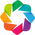

In [16]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas

In [17]:
pwd

'/nrs/flyem/bergs/resegmenation-v2a'

In [18]:
ls

analyze-v2a.ipynb    assigned-ccs.csv   assignment-bodies.csv     seg_38c6ad/
assigned-bodies.csv  assigned-ccs.json  missing-assigned-svs.csv


In [19]:
!wc -l seg_38c6ad/overlap*

  7591759 seg_38c6ad/overlap_groups_38c6ad_ccs_dpoints_v3.csv
   426259 seg_38c6ad/overlap_groups_38c6ad_ccs_v3
   831691 seg_38c6ad/overlap_groups_38c6ad_v3.txt
  8849709 total


In [20]:
for line in open('seg_38c6ad/README.txt', 'r'):
    print(textwrap.fill(line, 100))

From: Michal Januszewski <mjanusz@google.com>
To: Takemura, Shin-ya <takemuras@janelia.hhmi.org>
Cc: Plaza, Stephen <plazas@janelia.hhmi.org>; Berg, Stuart <bergs@janelia.hhmi.org>; Rivlin, Pat
<rivlinp@janelia.hhmi.org>; Viren Jain <viren@google.com>
Date: Wednesday, October 31, 2018 at 11:24 AM

Hi everyone,

Thanks for the false split examples, this was very helpful! I've looked into these cases in some
detail. The good news is that a new segmentation I already have solves 11/13 of the cases. The more
tricky part is figuring out how to best integrate this into the current reconstruction. What follows
is some background information on what I did, and some initial thoughts on how you might be able to
use this data.

- The new segmentation (let's call it v2a) is based on a model trained on a number of sparsely
traced bodies that I manually agglomerated from the current hemibrain base segmentation. I then used
your 100+ sparsely traced bodies to select a best-performing checkpoint as me

### Load merge groups

In [21]:
!head -n1 seg_38c6ad/overlap_groups_38c6ad_v3.txt

"1344029302,881212361,1066727044,1344029413,1158501935,1159814707,1128451692"


In [22]:
sv_groups = []
with open('seg_38c6ad/overlap_groups_38c6ad_v3.txt', 'r') as f:
    for line in f:
        group = list(map(int, line.strip()[1:-1].split(',')))
        sv_groups.append(group)

In [23]:
num_svs = len(pd.unique(list(chain(*sv_groups))))
print(f"Read {len(sv_groups)} groups with a total of {num_svs} unique_svs")

Read 831691 groups with a total of 2828265 unique_svs


### Convert to DataFrame

In [24]:
merges_data = []
for i, group in enumerate(sv_groups):
    for sv in group:
        merges_data.append( (i, sv) )

In [25]:
merges_df = pd.DataFrame(merges_data, columns=['group', 'sv'])
merges_df['sv'] = merges_df['sv'].astype(np.uint64)

### Map to bodies

In [26]:
analysis_uuid = 'd59e'
analysis_node = ('emdata1:8900', analysis_uuid) # MIRROR
analysis_seg = (*analysis_node, 'segmentation')

In [28]:
mapping = fetch_mappings(*analysis_seg)
mapper = LabelMapper(mapping.index.values, mapping.values)

INFO [2018-11-12 16:09:34,498] Fetching http://emdata1:8900/api/node/d59e/segmentation/mappings...
INFO [2018-11-12 16:10:42,748] Fetching http://emdata1:8900/api/node/d59e/segmentation/mappings took 0:01:08.248908
INFO [2018-11-12 16:10:42,749] Parsing mapping...
INFO [2018-11-12 16:10:51,082] Parsing mapping took 0:00:08.332398


In [29]:
merges_df['body'] = mapper.apply(merges_df['sv'].values, True)

In [30]:
merges_df.head()

,group,sv,body
0,0,1344029302,1344029302
1,0,881212361,881212361
2,0,1066727044,1066727044
3,0,1344029413,881212361
4,0,1158501935,881212361


In [31]:
merges_df.shape

(3097281, 3)

### Group SVs by body

In [32]:
%%time
body_svs_df = merges_df.groupby('body').agg({'sv': pd.unique, 'group': 'nunique'})
body_svs_df.rename(columns={'group': 'num_groups'}, inplace=True)

CPU times: user 3min 19s, sys: 4.31 s, total: 3min 23s
Wall time: 3min 17s


In [33]:
body_svs_df.head()

,sv,num_groups
body,,
93,93,1
109,109,2
207,207,1
218,218,1
219,219,1


In [34]:
body_svs_df.loc[881212361, 'sv']

array([ 881212361, 1344029413, 1158501935,  880880155, 1621975263,
       1591281456, 1003672869,  911919243,  911919127, 1003668470,
       1003668433,  911919255, 1343688173, 1684044701, 1653010304,
       1684044662, 1653010220], dtype=uint64)

### Find connected components (by body)

In [35]:
body_edges = []
for g, df in merges_df.groupby('group'):
    bodies = df['body'].values
    body_edges.extend( [*zip(bodies[:-1], bodies[1:])] )
del df
body_edges = np.array(body_edges, np.uint64)

In [36]:
unique_bodies = pd.unique(merges_df['body'].values)
body_cc = connected_components_nonconsecutive(body_edges, unique_bodies)

In [37]:
body_df = pd.DataFrame({'body': unique_bodies, 'cc': body_cc})
print(f"Found {body_df['cc'].max()+1} components from {len(unique_bodies)} bodies")
body_df.head()

Found 562593 components from 2717138 bodies


,body,cc
0,1344029302,0
1,881212361,0
2,1066727044,0
3,1159814707,0
4,1128451692,0


### Load body stats; append stats columns

In [38]:
# This stats table should have all bodies with 
_p = f'/nrs/flyem/bergs/complete-ffn-agglo/focused-{analysis_uuid}-0tbars-0psds-0.0Mv.npy'
body_stats_df = pd.DataFrame(np.load(_p))
body_stats_df['is05'] = body_stats_df.eval('PreSyn >= 2 or PostSyn >= 10 or voxel_count >= 10e6')

In [39]:
# Using 'inner' merge: Drop bodies that aren't mentioned in the stats table
body_df = body_df.merge(body_stats_df, how='inner', on='body')
body_df.head()

,body,cc,voxel_count,sv_count,PostSyn,PreSyn,is05
0,881212361,0,279508408,204,58,228,True
1,1066727044,0,181641,1,0,0,False
2,1159814707,0,485664,1,0,0,False
3,1128451692,0,199508,1,1,0,False
4,295499544,1,849232,1,0,0,False


### Group by CC

In [41]:
# While grouping, compute aggregated stats of each group for:
# - all bodies in the group
# - 0.5 bodies in the group

# Append appropriate '05' stats for each row before aggregation
body_df['body_count'] = 1
stats_cols = ['body_count', 'voxel_count', 'sv_count', 'PostSyn', 'PreSyn']
for col in stats_cols:
    col05 = col + '05'
    body_df[col05] = body_df[col].copy()
    body_df.loc[~(body_df['is05']), col05] = 0

# Group/aggregate
full_cc_df = body_df.drop(columns=['body', 'is05']).groupby('cc').sum()
full_cc_df['voxel_pct05'] = 100*full_cc_df['voxel_count05'] / full_cc_df['voxel_count']

### Filter by merge count

In [42]:
MIN_05_BODIES = 2
MAX_05_BODIES = 100
cc_df = full_cc_df.query('body_count05 >= @MIN_05_BODIES and body_count05 <= @MAX_05_BODIES')

In [43]:
# Print full stats
merge_groups05 = len(full_cc_df)
body_reductions = (full_cc_df['body_count05'] - 1).sum()
print(f"Found {merge_groups05} 0.5 groups resulting in {body_reductions} body count reduction")

# Print filtered stats
merge_groups05 = len(cc_df)
body_reductions = (cc_df['body_count05'] - 1).sum()
print(f"After dropping huge merges, found {merge_groups05} 0.5 groups, "
      f"resulting in {body_reductions} body count reduction")

Found 283927 0.5 groups resulting in -106979 body count reduction
After dropping huge merges, found 18663 0.5 groups, resulting in 35177 body count reduction


In [44]:
cc_df.head()

,voxel_count,sv_count,PostSyn,PreSyn,body_count,body_count05,voxel_count05,sv_count05,PostSyn05,PreSyn05,voxel_pct05
cc,,,,,,,,,,,
4,519556073,463,139,80,129,4,481239419,320,136,79,92.625117
7,1135642719,1394,2349,444,91,5,1115403050,1293,2325,439,98.217778
11,1602674377,2106,2251,821,48,2,1592732893,2050,2242,818,99.379694
13,5973495,15,5,10,3,2,5657324,14,5,9,94.707102
14,2343549058,2142,1469,655,230,13,2245761730,1850,1453,647,95.827383


In [45]:
cc_df['voxel_pct05'].sort_values(ascending=False).reset_index(drop=True).hvplot()

:Curve   [index]   (voxel_pct05)

In [46]:
cc_df[['body_count', 'body_count05']].sort_values(['body_count'], ascending=True).reset_index(drop=True).hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [47]:
#cc_df.['body_count'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [48]:
#cc_df['body_count05'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [49]:
body_df.head()

,body,cc,voxel_count,sv_count,PostSyn,PreSyn,is05,body_count,body_count05,voxel_count05,sv_count05,PostSyn05,PreSyn05
0,881212361,0,279508408,204,58,228,True,1,1,279508408,204,58,228
1,1066727044,0,181641,1,0,0,False,1,0,0,0,0,0
2,1159814707,0,485664,1,0,0,False,1,0,0,0,0,0
3,1128451692,0,199508,1,1,0,False,1,0,0,0,0,0
4,295499544,1,849232,1,0,0,False,1,0,0,0,0,0


### Sort CCs by body count

In [50]:
kept_cc_df = cc_df.sort_values(['body_count', 'sv_count'])
kept_ccs = kept_cc_df.index
cc_ranker = LabelMapper(kept_ccs.values.astype(np.uint32), np.arange(len(kept_ccs), dtype=np.uint32))

kept_body_df = body_df.query('cc in @kept_ccs').copy()
kept_body_df['cc_rank'] = cc_ranker.apply(kept_body_df['cc'].values.astype(np.uint32))
kept_body_df.sort_values('cc_rank', inplace=True)
kept_body_df.head()

,body,cc,voxel_count,sv_count,PostSyn,PreSyn,is05,body_count,body_count05,voxel_count05,sv_count05,PostSyn05,PreSyn05,cc_rank
78547,1344734049,14705,1512237,1,0,2,True,1,1,1512237,1,0,2,0
78548,1344733376,14705,1477007,1,3,2,True,1,1,1477007,1,3,2,0
150683,487165000,53654,1905195,1,9,3,True,1,1,1905195,1,9,3,1
150684,487165399,53654,810640,1,7,2,True,1,1,810640,1,7,2,1
292321,1442607797,105144,474574,1,0,3,True,1,1,474574,1,0,3,2


### Write JSON assignment

In [51]:
objs = []
for cc, df in tqdm_notebook(kept_body_df.sort_values('cc_rank').groupby('cc', sort=False)):
    svs = []

    # List only the SVs that were listed by Michal
    for body in df['body'].tolist():
        svs += body_svs_df.loc[body, 'sv'].reshape(-1).tolist()

    obj = { "task type": "merge review",
            "supervoxel IDs": svs,

            # Debug elements
            "original_uuid": analysis_uuid,
            "cc_index": int(cc),
            "original_bodies": mapper.apply(np.array(svs, np.uint64), True).tolist(),
            "merge_group_count": int(body_svs_df.loc[body, 'num_groups']),
            "total_body_count": len(df),
            "total_voxel_count": int(df['voxel_count'].sum()),
            "total_sv_count": int(df['sv_count'].sum())
          }
    objs.append(obj)

HBox(children=(IntProgress(value=0, max=18663), HTML(value='')))

In [54]:
assignment = {
  "file type": "Neu3 task list",
  "file version": 1,
  "task list": objs
}
with open(f'merge-review-assignment-{analysis_uuid}.json', 'w') as f:
    ujson.dump(assignment, f, indent=2)

### Write debug CSV files

In [53]:
_df = kept_body_df[['body', 'cc', 'is05', 'voxel_count', 'sv_count', 'PostSyn', 'PreSyn']]
_df.to_csv(f'assigned-bodies-{analysis_uuid}.csv', index=False)
kept_cc_df.to_csv(f'assigned-ccs-{analysis_uuid}.csv', index=True)

## DEBUG
## ---------------------